## 온라인 학습활동 과제 13. Heart Disease UCI 분석

### 빅데이터전공 20175327 이연희 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

D:\python\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\python\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


#### 과제를 해결하던 중, 찾아보니 원본 데이터가 일부 수정된것을 확인할 수 있었습니다! (변수명, target 표기방식, Unnamed 열 삭제)
#### 본 과제는 변경된 데이터에 맞춰 진행하였습니다.  


- Data Set Information:
    - 심장질환의 유무를 판정하는 데이터집합
    - Cleveland database 76개 속성중 14개만 추출
- age : 나이
- sex(1 = male; 0 = female) : 성별
- cp : chest pain type 흉통 유형(1 = 전형적인 협심증, 2 = 비정형 협심증, 3 = 비협심증 통, 4 : 무증상)
- trestbps : 혈압 (resting blood pressure , mmHg)
- chol : 혈청 (cholestoral mg / dl)
- fbs : 공복 혈당 (> 120 mg / dl 이면 1, 아니면 0)
- restecg : 심전도 (0 : 정상, 1 :ST-T 파 이상, 2 :좌심실 비대)
- thalach :  최대 심박수
- exang : 운동 유발 협심증 (1 = yes; 0 = no)
- oldpeak :  ST 우울증
- slope : 최대 운동 ST의 기울기 (1: upsloping, 2: flat, 3: downsloping)
- ca : 주요혈관수 (0-3)
- thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
- target : 심장병 진단 결과 (혈관 조영 상태) 0 : 주요혈관 축소 50%미만, 1: 주요혈관 축소 50%이상

In [2]:
# 1. Heart.csv 파일 열기
heart = pd.read_csv('Heart.csv')
#display(heart)

데이터 타입 =


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

상위 5개 데이터 =


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


하위 5개 데이터 =


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


heart.describe()=               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


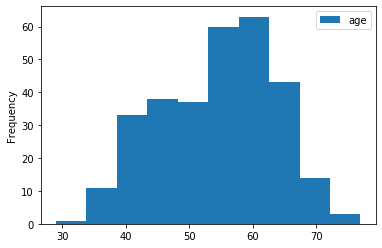

In [3]:
# 2. 데이터 타입들, 상하위 5개 데이터 확인
print("데이터 타입 =")
display(heart.dtypes)
print("상위 5개 데이터 =")
display(heart.head(5))
print("하위 5개 데이터 =")
display(heart.tail(5))

# 제공되는 데이터에서 3,4번 문제는 해결되어 제공되었습니다.
# 3. Unnamed: 0 열 삭제 (원본에서 삭제)
#heart.drop('Unnamed: 0', axis=1, inplace=True)  
#print("heart.columns = ", heart.columns)  #열 레이블

# 4. AHD 변경, No=0, Yes=1
#print(heart.target)
#heart.target  = (heart.target == 'Yes').astype('int32')

# 5. 통계요약
print("heart.describe()=", heart.describe())

# 6. 나이 역순으로 정렬
heart_sort = heart.sort_values(by='age', ascending=False) 
display(heart_sort)

# 7. 누락된 값 있는 행삭제
heart_nan = heart.dropna(how='any')
display(heart_nan)

# 8. 나이의 histogram(분포 확인)
heart.plot.hist(y='age')


1    207
0     96
Name: sex, dtype: int64

전체:  303
남성:  207
여성:  96


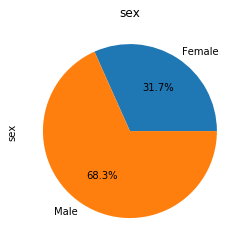

In [4]:
# 9. 성별에 대한 pie plot (백분율로 표시)
sex_count = heart.sex.value_counts()  # 각 값에 따른 개수
display(sex_count)

total=len(heart.sex)
male=len(heart[heart.sex==1])
female=len(heart[heart.sex==0])
print('전체: ',total)
print('남성: ',male)
print('여성: ',female)

sex_grouped = heart.groupby(heart['sex'])
sex_count = sex_grouped['sex'].count()

sex_count.plot.pie(title='sex',autopct='%1.1f%%',labels=['Female','Male'])

Text(0.5, 1.0, 'Chest Type')

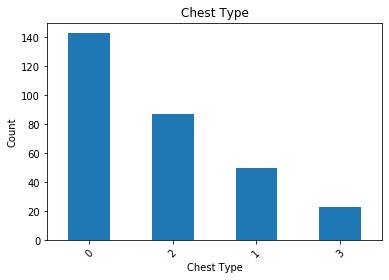

In [5]:
# 10. ChestPain 에 대한 카운트 bar chart
cnt = heart.cp.value_counts()
cnt.plot.bar(rot=45)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type')

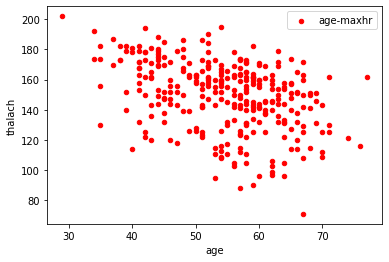

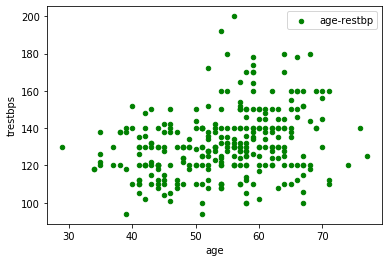

In [6]:
# 11. 나이와 최대심박수, 나이와 혈압과의 관계 확인 (상관계수, scatter plot)
x = heart.plot.scatter(x='age', y='thalach', c='Red',label='age-maxhr')
ax = heart.plot.scatter(x='age', y='trestbps', c='Green',label='age-restbp')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002091A1D7D68>,
      dtype=object)

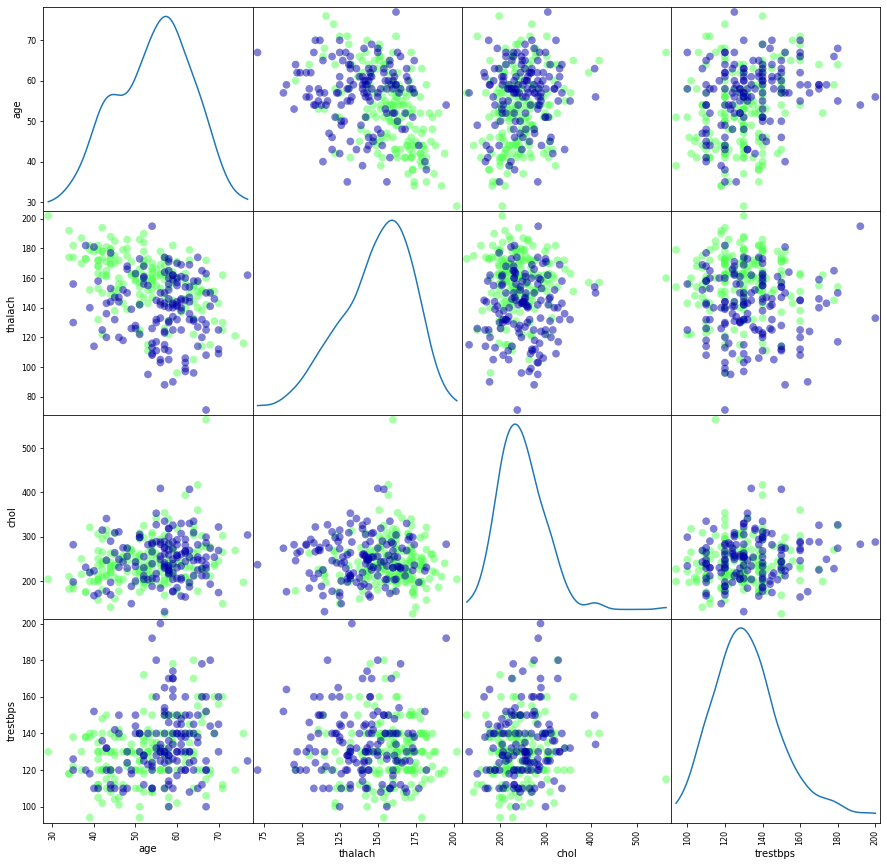

In [7]:
# 12. 심장병(target(AHD))과 상관관계가 높은 속성중 4개만 선택하여 심장병과의 관계 분석 scatter_matrix()
heart_x = heart[['age','thalach','chol','trestbps']]
heart_y = heart.target

pd.plotting.scatter_matrix(heart_x, s=60,figsize=(15, 15),marker='o',c=heart_y,
                           diagonal='kde',cmap = mglearn.cm3)

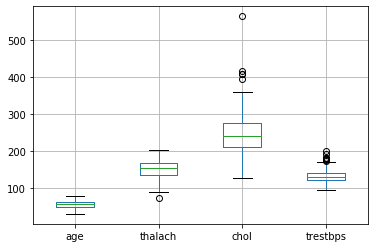

In [8]:
# 13. 4개 특징의 분포 확인 (boxplot)
heart_x.boxplot()

In [9]:
# 14. target(AHD)을 기준(groupby)으로 최대, 최소, 평균, 표준편차 계산
AHD_grouped = heart.groupby('target')

print("최대 = ")
display(AHD_grouped.max())
print("최소 =")
display(AHD_grouped.min())
print("평균 =")
display(AHD_grouped.mean())
print("표준편차 =")
display(AHD_grouped.std())

최대 = 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,77,1,3,200,409,1,2,195,1,6.2,2,4,3
1,76,1,3,180,564,1,2,202,1,4.2,2,4,3


최소 =


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,35,0,0,100,131,0,0,71,0,0.0,0,0,0
1,29,0,0,94,126,0,0,96,0,0.0,0,0,0


평균 =


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


표준편차 =


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762
1,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752


In [10]:
# 15. 4개 특징과 target(AHD)를 이용하여 학습데이터, 테스트데이터 집합 준비 (테스트 데이터는 전체에 20%)
# trin: 75%, test: 25%
# X 입력 데이터 2차원, y 출력레이블 1차원

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    heart_x, heart['target'], test_size=0.2, random_state=1)

print("X_학습데이터: {}".format(X_train.shape))
print("y_학습데이터: {}".format(y_train.shape))

print("X_테스트데이터: {}".format(X_test.shape))
print("y_테스트데이터: {}".format(y_test.shape))

X_학습데이터: (242, 4)
y_학습데이터: (242,)
X_테스트데이터: (61, 4)
y_테스트데이터: (61,)


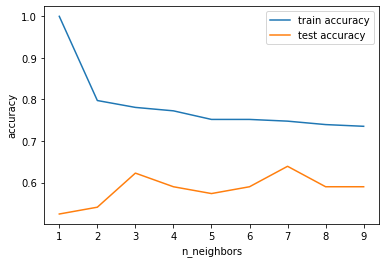

In [11]:
# 16. 1-NN~ 9-NN 테스트 성능 비교 (그래프로 확인)
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test=train_test_split(heart_x,heart_y,test_size=0.2,  stratify=heart_y, random_state=42)
z

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,10)

for n_neighbors in neighbors_settings:
    #model 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #훈련세트 정확도 저장
    training_accuracy.append(clf.score(X_train,y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label="train accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()